In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_all = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\df_all.csv")


In [23]:
df_all = pd.read_csv('C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\Paper1-Release\\Output\\Long-Test\\Features\\Features_Long-Test.csv')

df_all['BaseChange'] = 0
df_all['FracChange'] = 0
df_all['ValueRS'] = 0
df_all['Group'] = df_all['Feature'].str.split('_').str[0]
df_all['Feature'] = df_all['Feature'].str.split('_').str[1]

patIDs = df_all['PatID'].unique()

df_volume = df_all.loc[df_all['Feature'] == 'MeshVolume']
df_volume = df_volume.loc[df_volume['ContourType'] == 'Manual']
for pat in patIDs:
    df_temp = df_volume[df_volume['PatID'] == pat]

    #df_temp['FeatureChange'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].iloc[0]) / df_temp['FeatureValue'].iloc[0]
    # make Feature change as a percentage of the first value

    df_temp['BaseChange'].iloc[0] = 0
    df_temp['ValueRS'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].mean()) / df_temp['FeatureValue'].std()
    for i in range(1, len(df_temp)):
        if i == 1:
            df_temp['FracChange'].iloc[i] = 0
            df_temp['BaseChange'].iloc[i] = 0
        else:
            df_temp['BaseChange'] = (df_temp['FeatureValue'] - df_temp['FeatureValue'].iloc[0]) / df_temp['FeatureValue'].iloc[0] 
            df_temp['FracChange'].iloc[i] = df_temp['FeatureValue'].iloc[i] - df_temp['FeatureValue'].iloc[i-1] / df_temp['FeatureValue'].iloc[i-1]
    # merge back in to df_fo
    df_volume.loc[df_volume['PatID'] == pat, 'BaseChange'] = df_temp['BaseChange']
    df_volume.loc[df_volume['PatID'] == pat, 'FracChange'] = df_temp['FracChange']
    df_volume.loc[df_volume['PatID'] == pat, 'ValueRS'] = df_temp['ValueRS']

    df_signal = df_all.loc[df_all['Feature'] == 'Median']


    print(pat)
    print(df_temp)
df_volume['BaseChange'] = df_volume['BaseChange'].abs()
# df_volume = df_volume.groupby(['Fraction']).median()
df_volume = df_volume.reset_index()
df_volume['BaseChange'] = df_volume["BaseChange"] + 1

df_signal['BaseChange'] = df_signal['BaseChange'].abs()
df_signal = df_signal.groupby(['Fraction']).median()
df_signal = df_signal.reset_index()
df_signal['BaseChange'] = df_signal["BaseChange"] + 1

1642
     Unnamed: 0  PatID  Fraction Contour ContourType     Feature  \
8             8   1642         1      RP      Manual  MeshVolume   
115         115   1642         2      RP      Manual  MeshVolume   
222         222   1642         3      RP      Manual  MeshVolume   
329         329   1642         4      RP      Manual  MeshVolume   
436         436   1642         5      RP      Manual  MeshVolume   

     FeatureValue  BaseChange   FracChange   ValueRS  Group  
8     16748.68403    0.000000      0.00000 -1.662155  shape  
115   22840.58241    0.363724      0.00000  0.959819  shape  
222   21474.71290    0.282173  21473.71290  0.371944  shape  
329   21570.69182    0.287904  21569.69182  0.413254  shape  
436   20418.01879    0.219082  20417.01879 -0.082861  shape  
1029
       Unnamed: 0  PatID  Fraction Contour ContourType     Feature  \
15523           8   1029         1      RP      Manual  MeshVolume   
15630         115   1029         2      RP      Manual  MeshVolume   

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [6]:
df_volume = df_volume[['PatID','Fraction', 'FeatureValue', 'ValueRS', 'BaseChange', 'FracChange']]
#df_volume.to_csv('..\\TestData\\Man_Volume.csv')


In [7]:
frac1 = df_volume.loc[df_volume['Fraction'] == 1]['BaseChange'].values
frac1

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

ValueError: Could not interpret input 'Contour'

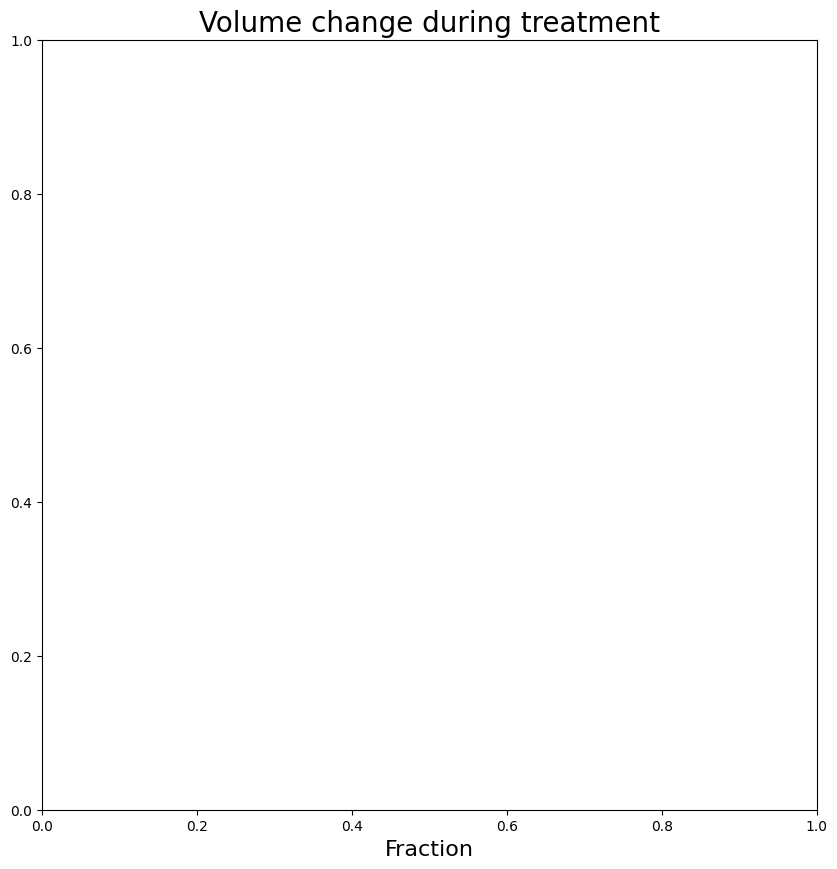

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Volume change during treatment', fontsize=20)
ax.set_xlabel('Fraction', fontsize=16)
# ax_set = ax.set(ylim=(0.9, 1.3))


sns.barplot(x='Fraction', y='BaseChange', palette = 'Greens_d', hue = 'Contour', data=df_volume, ax=ax, estimator=np.median, errorbar=('pi', 95), capsize=.2)
# sns.barplot(x='Fraction', y='BaseChange', palette = 'Reds_d', data=df_signal, ax=ax)
ax.set_ylabel('Relative Volume Change', fontsize=16)

# add labels to each bar plot in the graph
for p in ax.patches:
    ax.annotate('+' +format((p.get_height() - 1) * 100, '.0f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.16),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
# sns.despine()

In [9]:
df_volume

,PatID,Fraction,FeatureValue,ValueRS,BaseChange,FracChange
0,1642,1,16748.68403,-1.662155,1.000000,0.00000
1,1642,2,22840.58241,0.959819,1.363724,0.00000
2,1642,3,21474.71290,0.371944,1.282173,21473.71290
3,1642,4,21570.69182,0.413254,1.287904,21569.69182
4,1642,5,20418.01879,-0.082861,1.219082,20417.01879
...,...,...,...,...,...,...
95,1303,1,9887.62323,-1.400578,1.000000,0.00000
96,1303,2,12665.42750,0.222469,1.280938,0.00000
97,1303,3,11577.88819,-0.412971,1.170948,11576.88819
98,1303,4,12746.62040,0.269909,1.289149,12745.62040


Text(0, 0.5, 'Relative Change')

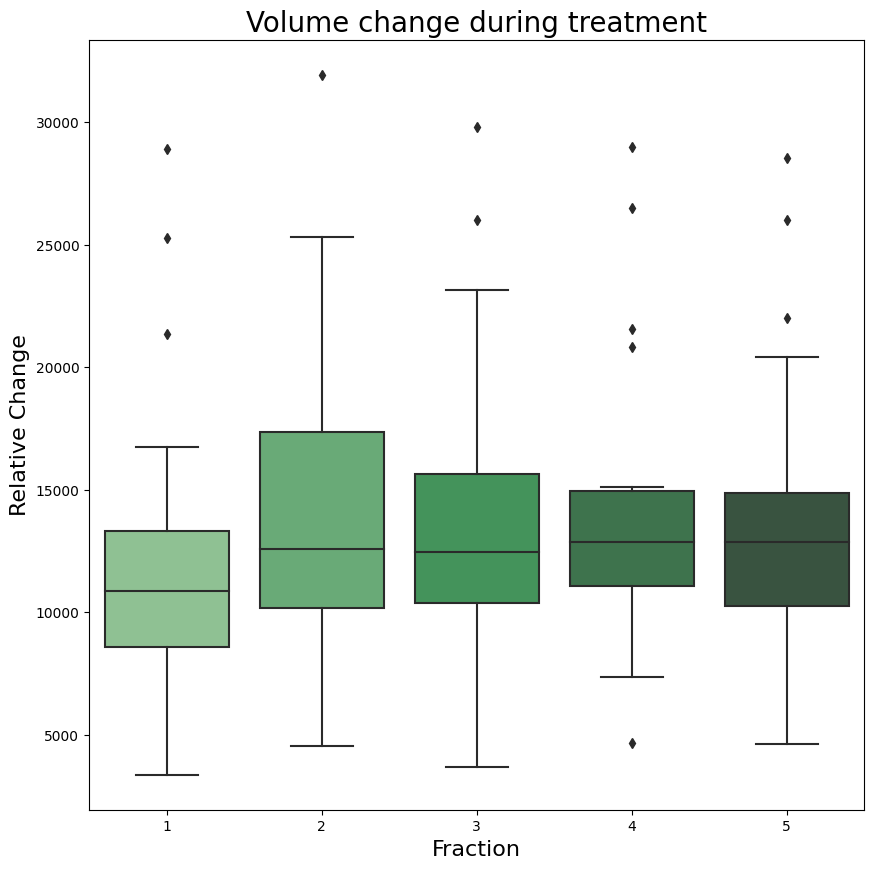

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))

# box plot
ax.set_title('Volume change during treatment', fontsize=20)
ax.set_xlabel('Fraction', fontsize=16)
# ax_set = ax.set(ylim=(0.9, 1.3))


sns.boxplot(x='Fraction', y='FeatureValue', palette = 'Greens_d', data=df_volume, ax=ax)
# sns.barplot(x='Fraction', y='BaseChange', palette = 'Reds_d', data=df_signal, ax=ax)
ax.set_ylabel('Relative Change', fontsize=16)


# sns.despine()

In [14]:
df_plot = df_signal.copy()

df_plot.reset_index(inplace=True)
df_plot



,index,Unnamed: 0,PatID,Fraction,Contour,ContourType,Feature,FeatureValue,BaseChange,FracChange,ValueRS,Group
0,23,23,1642,1,RP,Manual,Median,56.0,0,0,0,firstorder
1,130,130,1642,2,RP,Manual,Median,75.0,0,0,0,firstorder
2,237,237,1642,3,RP,Manual,Median,66.0,0,0,0,firstorder
3,344,344,1642,4,RP,Manual,Median,63.0,0,0,0,firstorder
4,451,451,1642,5,RP,Manual,Median,56.0,0,0,0,firstorder
...,...,...,...,...,...,...,...,...,...,...,...,...
195,20888,23,1303,1,MS,Manual,Median,51.0,0,0,0,firstorder
196,20995,130,1303,2,MS,Manual,Median,60.0,0,0,0,firstorder
197,21102,237,1303,3,MS,Manual,Median,55.0,0,0,0,firstorder
198,21209,344,1303,4,MS,Manual,Median,61.0,0,0,0,firstorder


In [24]:
df_signal = df_all[df_all['Feature'] == 'Median']

df_signal = df_signal[df_signal['ContourType'] == 'Manual']
df_signal

,Unnamed: 0,PatID,Fraction,Contour,ContourType,Feature,FeatureValue,BaseChange,FracChange,ValueRS,Group
23,23,1642,1,RP,Manual,Median,56.0,0,0,0,firstorder
130,130,1642,2,RP,Manual,Median,75.0,0,0,0,firstorder
237,237,1642,3,RP,Manual,Median,66.0,0,0,0,firstorder
344,344,1642,4,RP,Manual,Median,63.0,0,0,0,firstorder
451,451,1642,5,RP,Manual,Median,56.0,0,0,0,firstorder
...,...,...,...,...,...,...,...,...,...,...,...
20888,23,1303,1,MS,Manual,Median,51.0,0,0,0,firstorder
20995,130,1303,2,MS,Manual,Median,60.0,0,0,0,firstorder
21102,237,1303,3,MS,Manual,Median,55.0,0,0,0,firstorder
21209,344,1303,4,MS,Manual,Median,61.0,0,0,0,firstorder


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1.         1.363724   1.28217315 1.28790368 1.21908197 1.
 1.26869102 1.35537172 1.13488007 1.23603835 1.         1.0363995
 1.02240167 1.11219722 1.04513678 1.         1.11182055 1.27304725
 1.20837018 1.12231903 1.         1.23433348 1.17341262 1.00369112
 1.09191358 1.         1.34590487 1.0987182  1.38397194 1.37175574
 1.         1.39453138 1.2368419  1.37409113 1.30232803 1.
 1.20070478 1.60410052 1.60190432 1.39532284 1.         1.06198458
 1.08420055 1.17539604 1.12928753 1.         1.18226638 1.17022479
 1.23263813 1.31523351 1.         1.18528746 1.21864261 1.24135655
 1.21805836 1.         1.5021291  1.51858571 1.13207487 1.05705302
 1.         1.25633758 1.23514968 1.50084035 1.44787349 1.
 1.15625132 1.2336861  1.1596606  1.06443217 1.         1.16235525
 1.08325774 1.155

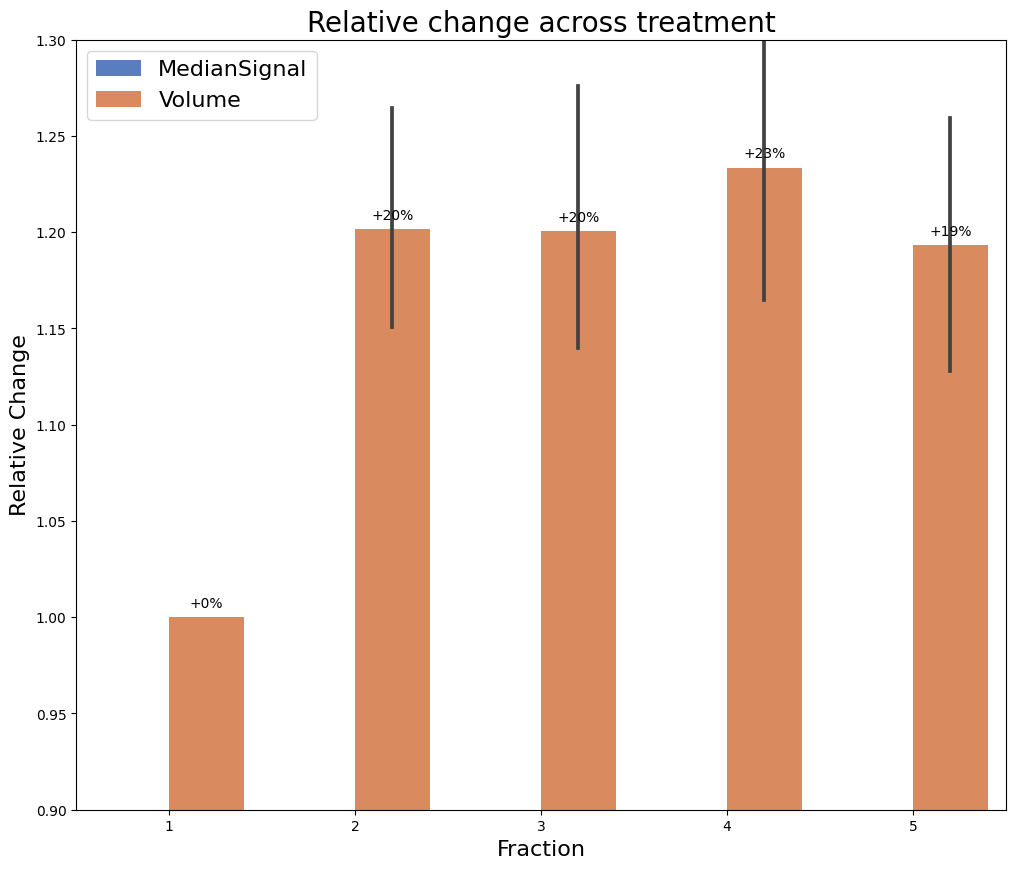

In [25]:
vals_sig = df_signal['BaseChange'].values
print(vals_sig)
vals_vol = df_volume['BaseChange'].values
print(vals_vol)
vals_vol[0] = 1
vals_frac = df_volume['Fraction'].values
# make new df
df_bar = pd.DataFrame({'MedianSignal': vals_sig, 'Volume': vals_vol, 'Fraction': vals_frac})

df_bar = df_bar.melt(id_vars=['Fraction'], var_name='Type', value_name='BaseChange')

fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(x='Fraction', y='BaseChange', hue='Type', data=df_bar, palette='muted')
ax.set_xlabel('Fraction', fontsize=16)
ax_set = ax.set(ylim=(0.9, 1.3))


# sns.barplot(x='Fraction', y='BaseChange', palette = 'Greens_d', data=df_volume, ax=ax)
#sns.barplot(x='Fraction', y='BaseChange', palette = 'Reds_d', data=df_signal, ax=ax)
ax.set_ylabel('Relative Change', fontsize=16)
ax.set_xlabel('Fraction', fontsize=16)
ax.set_title('Relative change across treatment', fontsize=20)
ax.legend(loc='upper left', fontsize=16)

# add labels to each bar plot in the graph
for p in ax.patches:
    ax.annotate('+' +format((p.get_height() - 1) * 100, '.0f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

